
# Nonlinear regression review



-   Nonlinear models are abundant in reaction engineering
    -   $r = k C_A^n $ is linear in the $k$ parameter, and nonlinear in $n$
-   Nonlinear fitting is essentially a non-linear optimization problem
-   Unlike linear regression, where we directly compute the parameters, we have to provide an initial guess and iterate to the solution



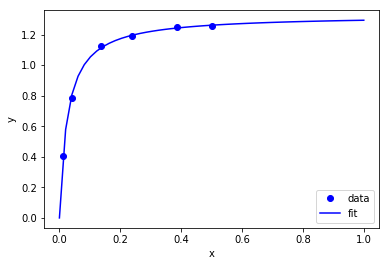

In [1]:
import numpy as np
from scipy.optimize import curve_fit

x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])

# this is the function we want to fit to our data
def func(x, a, b):
    'nonlinear function in a and b to fit to data'
    return a * x / (b + x)

initial_guess = [1.2, 0.03]
pars, pcov = curve_fit(func, x, y, p0=initial_guess)

import matplotlib.pyplot as plt
plt.plot(x,y,'bo ')
xfit = np.linspace(0,1)
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'b-')
plt.legend(['data','fit'],loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('images/nonlin-curve-fit.png')
plt.show()

![img](./images/nonlin-curve-fit.png)

-   Again, you should always visually inspect the fit

-   We also need to estimate uncertainties in nonlinear parameters

-   `pycse` provides a function for this: `nlinfit`.



In [3]:
import numpy as np
from pycse import nlinfit

x = np.array([0.5, 0.387, 0.24, 0.136, 0.04, 0.011])
y = np.array([1.255, 1.25, 1.189, 1.124, 0.783, 0.402])

# this is the function we want to fit to our data
def func(x, a, b):
    'nonlinear function in a and b to fit to data'
    return a * x / (b + x)

initial_guess = [1.2, 0.03]
alpha = 0.05
pars, pint, se = nlinfit(func, x, y, initial_guess, alpha)

aint, bint = pint
print('The 95% confidence interval on a is {0}'.format(aint))
print('The 95% confidence interval on b is {0}'.format(bint))

The 95% confidence interval on a is [ 1.30053659  1.35452624]
The 95% confidence interval on b is [ 0.02360765  0.02931546]


-   Here the two intervals are relatively small, and do not include zero, suggesting both parameters are significant.




# Deriving rate laws from mechanisms

